# Predicting which passengers could survive in Titanic

## Background
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will complete the analysis of what sorts of people were likely to survive. In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

## Get the data ready

In [50]:
### import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%pylab inline
import matplotlib.patches as mpatches

Populating the interactive namespace from numpy and matplotlib


/Users/jeremydai/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [51]:
### read data
titanic = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')
#'PassengerID'and'Ticket'are irrelevant to our study, which will be excluded from our study.
titanic=titanic.drop(['PassengerId','Ticket'],axis=1)
#titanic.head(10)

## Feature Engineering

In [52]:
# Handling missing data
total_data = titanic.count()
percent_data=total_data/total_data['Survived']
percent_data

Survived    1.000000
Pclass      1.000000
Name        1.000000
Sex         1.000000
Age         0.801347
SibSp       1.000000
Parch       1.000000
Fare        1.000000
Cabin       0.228956
Embarked    0.997755
dtype: float64

Based on the table, we can see that about 73% of recorded passengers lack 'Cabin' data and about 20% of age data are missing. 

Next, we will test if the passengers with cabin/age data have the same survival rate with those that do not have age data. It will help us to decide how we handle the missing data.

In [53]:
# Define function to plot
def plot(df,group):
    ratio=titanic.groupby(group).mean()['Survived']
    ratio.plot.bar(color='pink',alpha=0.7)
    plt.title("Survival Rate by %s" % group)
    plt.xticks(rotation=0)
    plt.ylabel('Survival Rate')
    return ratio

Without_Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

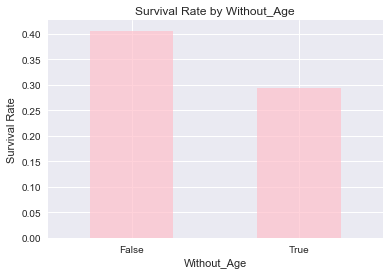

In [54]:
#Test if the passengers with age data have the same survival rate with those that do not have age data.
titanic['Without_Age']= titanic['Age'].isnull()
test['Without_Age']= test['Age'].isnull()
plot(titanic,"Without_Age")

Without_Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

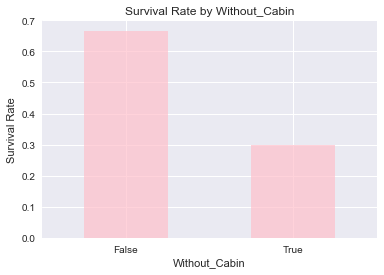

In [55]:
#Test if the passengers with cabin data have the same survival rate with those that do not have cabin data.
titanic['Without_Cabin']= titanic['Cabin'].isnull()
test['Without_Cabin']= test['Cabin'].isnull()
plot(titanic,"Without_Cabin")

It appears passengers without age or cabin information have a lower survivate rate. It may due to that it was harder to gather the age information of people who did not survive the trip. 

In this study, the Nan values are replaced with the mean age of the same SEX and PClass group. And we will replace the 'Cabin' column with a new column showing if there is cabin information for the passenger.

In [56]:
#Replace nan values use mean values
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

## Classification Models

In [57]:
from sklearn import svm
X = titanic.drop(['Survived','Without_Age','Cabin'],axis=1)
y = titanic['Survived']
clf = svm.SVC()
clf.fit(X, y)

ValueError: could not convert string to float: 'Q'

In [ ]:
test_feature= test.drop(['PassengerId','Without_Age','Cabin'],axis=1)

clf.predict(test_feature)